In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import unicodedata
import re
import acquire as a
import prepare as p

from wordcloud import WordCloud

In [197]:
def chicken(text):
    plt.figure(figsize=(16,9))
    chicken_mask = np.array(Image.open("newchickynugget.jpg"))

    wc = WordCloud(background_color="black", colormap = 'YlOrBr',width=800, height=400, contour_width=3, contour_color='peru',mask=chicken_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## 1.) Spam Dataset

### a.) Load the Spam Dataset

In [2]:
df = pd.read_csv('./spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### b.) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [5]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
                  ..
(will, enter)      1
(claim, a21)       1
(151, to)          1
(ou, are)          1
(class, x)         1
Length: 8719, dtype: int64

In [6]:
spam_bigrams = (pd.Series(nltk.bigrams(spam_words.split())).head(20))

In [7]:
spam_bigrams

0     (free, entry)
1       (entry, in)
2           (in, 2)
3            (2, a)
4         (a, wkly)
5      (wkly, comp)
6        (comp, to)
7         (to, win)
8         (win, fa)
9         (fa, cup)
10     (cup, final)
11    (final, tkts)
12     (tkts, 21st)
13      (21st, may)
14      (may, 2005)
15     (2005, text)
16       (text, fa)
17         (fa, to)
18      (to, 87121)
19      (87121, to)
dtype: object

In [8]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams

(you, have)           73
(have, won)           54
(your, mobile)        49
(to, claim)           46
(please, call)        44
(won, a)              40
(this, is)            40
(to, contact)         37
(you, are)            35
(stop, to)            28
(cash, or)            27
(u, have)             27
(or, a)               25
(will, be)            25
(a, a2000)            25
(contact, u)          24
(po, box)             24
(to, receive)         23
(a1000, cash)         23
(guaranteed, call)    23
dtype: int64

Text(0.5, 0, '# Occurances')

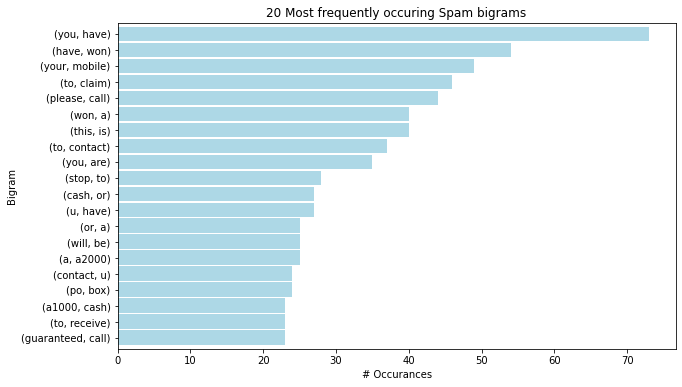

In [9]:
top_20_spam_bigrams.sort_values().plot.barh(color='lightblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

Top Bigrams for Spam


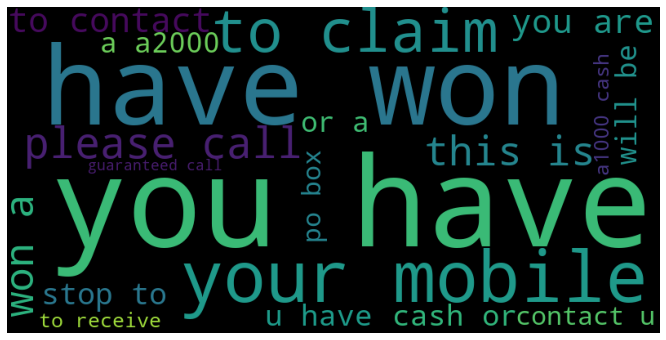

In [10]:
print('Top Bigrams for Spam')
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams

(are, you)     173
(i, am)        132
(have, a)      110
(i, will)       98
(do, you)       91
(you, are)      91
(in, the)       86
(if, you)       83
(i, have)       83
(i, dont)       82
(want, to)      79
(going, to)     76
(i, was)        74
(in, a)         73
(i, can)        71
(and, i)        71
(have, to)      70
(but, i)        70
(to, be)        66
(to, get)       65
dtype: int64

Text(0.5, 0, '# Occurances')

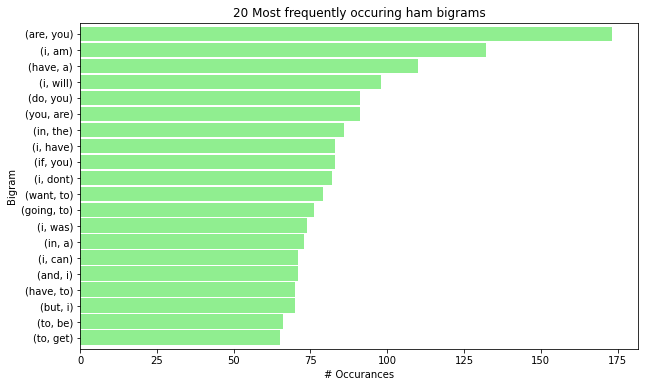

In [12]:
top_20_ham_bigrams.sort_values().plot.barh(color='lightgreen', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

Top Bigrams for Spam


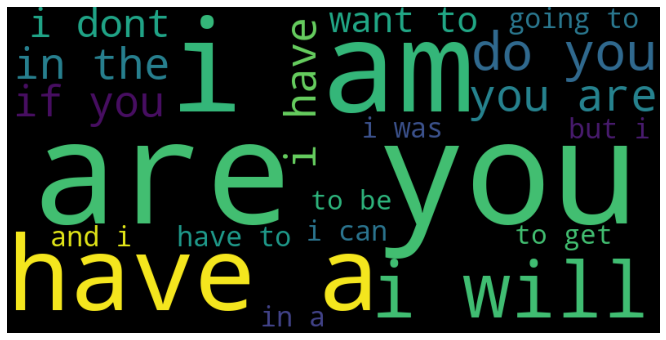

In [13]:
print('Top Bigrams for Ham Bigrams')
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

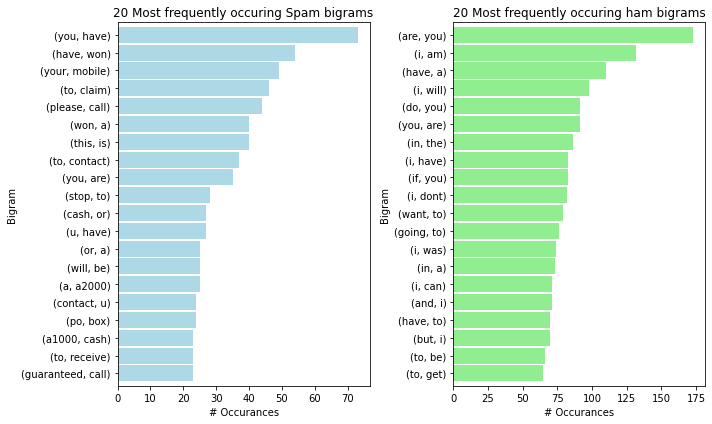

In [14]:
#putting them spam and ham side by side
plt.subplot(1,2,1)
top_20_spam_bigrams.sort_values().plot.barh(color='lightblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

plt.subplot(1,2,2)

top_20_ham_bigrams.sort_values().plot.barh(color='lightgreen', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

plt.tight_layout()
plt.show()

 - Spam messages tend to ask for an action and are not personalized, the messages seem very one-way.
 - Ham messages use a lot of "I", they look like normal responses in a typical conversation. There's more feelings.

### c.) Is there any overlap in the bigrams for the spam data and the ham data?

In [15]:
spam_bigrams = pd.DataFrame(nltk.ngrams(spam_words.split(),2))

In [16]:
spam_bigrams

,0,1
0,free,entry
1,entry,in
2,in,2
3,2,a
4,a,wkly
...,...,...
17588,now1,only
17589,only,10p
17590,10p,per
17591,per,minute


In [17]:
ham_bigrams= pd.DataFrame(nltk.ngrams(ham_words.split(),2))

In [18]:
ham_bigrams

,0,1
0,go,until
1,until,jurong
2,jurong,point
3,point,crazy
4,crazy,available
...,...,...
67509,rofl,its
67510,its,true
67511,true,to
67512,to,its


In [19]:
to_spam_or_ham = spam_bigrams.merge(ham_bigrams, how='inner')

In [20]:
to_spam_or_ham = to_spam_or_ham.value_counts()

Top Bigrams for Both


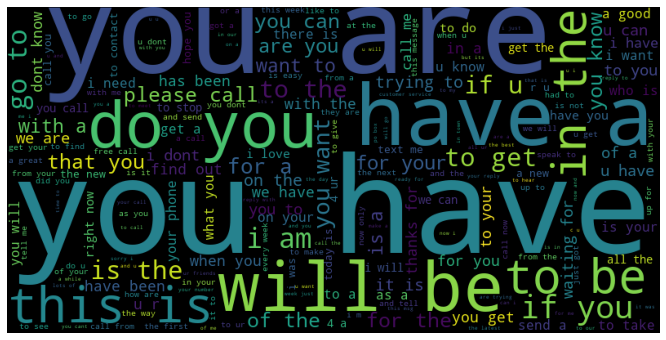

In [21]:
print('Top Bigrams for Both')
data = {k[0] + ' ' + k[1]: v for k, v in to_spam_or_ham.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### d.) Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [22]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(to, contact, u)             18
(urgent, your, mobile)       18
(from, land, line)           16
(valid, 12hrs, only)         16
(account, statement, for)    16
(to, contact, you)           16
(is, the, 2nd)               15
(cash, or, a)                15
(trying, to, contact)        15
(this, is, the)              15
(2nd, attempt, to)           14
(are, trying, to)            14
(we, are, trying)            14
(draw, shows, that)          14
(reply, or, call)            14
(shows, that, you)           14
dtype: int64

Text(0.5, 0, '# Occurances')

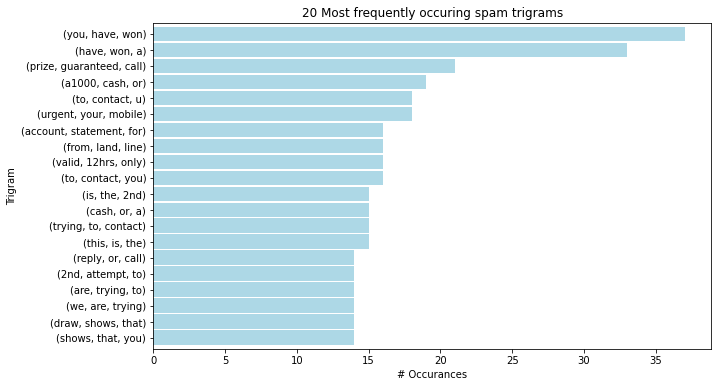

In [23]:
top_20_spam_trigrams.sort_values().plot.barh(color='lightblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

In [24]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
(have, a, great)      25
(i, miss, you)        24
(i, love, you)        23
(i, have, to)         20
(hope, you, are)      20
(give, me, a)         19
(i, dont, know)       19
(happy, new, year)    18
(do, have, a)         17
(a, great, day)       17
(u, wan, 2)           16
(you, want, to)       16
(on, the, way)        16
(i, will, be)         16
(what, are, you)      16
dtype: int64

Text(0.5, 0, '# Occurances')

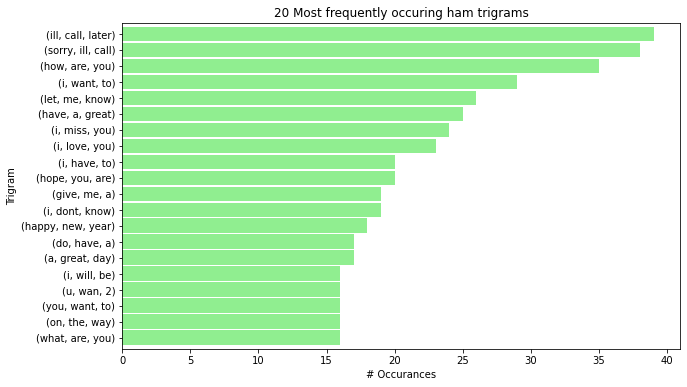

In [25]:
top_20_ham_trigrams.sort_values().plot.barh(color='lightgreen', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

### 2.) Explore the blog articles using the techniques discussed in the exploration lesson.

In [26]:
codeup_blog = a.get_codeup_blogs()

In [27]:
codeup_blog = pd.DataFrame(codeup_blog)

In [28]:
codeup_blog

,title,content
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [29]:
codeup_blog.content

0    The rumors are true! The time has arrived. Cod...
1    By Dimitri Antoniou and Maggie Giust\nData Sci...
2    By Dimitri Antoniou\nA week ago, Codeup launch...
3    SA Tech Job Fair\nThe third bi-annual San Anto...
4    Competitor Bootcamps Are Closing. Is the Model...
Name: content, dtype: object

In [30]:
codeup_words = clean(' '.join(codeup_blog.content))

In [31]:
codeup_words

'the rumors are true the time has arrived codeup has officially opened applications to our new data science career accelerator with only 25 seats available this immersive program is one of a kind in san antonio and will help you land a job in glassdoors 1 best job in america\ndata science is a method of providing actionable intelligence from data the data revolution has hit san antonio resulting in an explosion in data scientist positions across companies like usaa accenture booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecurity center and school of data science we built a program to specifically meet the growing demands of this industry\nour program will be 18 weeks long fulltime handson and projectbased our curriculum development and instruction is led by senior data scientist maggie giust who has worked at heb capital group and rackspace along with input from dozens of practitioners and hiring partners students will work with real data sets realistic problem

In [32]:
codeup_words = p.tokenize(codeup_words)

In [33]:
codeup_words = p.lemmatize(codeup_words)

In [34]:
codeup_words

'the rumor are true the time ha arrived codeup ha officially opened application to our new data science career accelerator with only 25 seat available this immersive program is one of a kind in san antonio and will help you land a job in glassdoors 1 best job in america data science is a method of providing actionable intelligence from data the data revolution ha hit san antonio resulting in an explosion in data scientist position across company like usaa accenture booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecurity center and school of data science we built a program to specifically meet the growing demand of this industry our program will be 18 week long fulltime handson and projectbased our curriculum development and instruction is led by senior data scientist maggie giust who ha worked at heb capital group and rackspace along with input from dozen of practitioner and hiring partner student will work with real data set realistic problem and the entire dat

In [37]:
codeup_words = p.remove_stopwords(codeup_words, extra_words=['ha'], exclude_words=[])

In [40]:
codeup_words = codeup_words.split()

In [45]:
codeup_words = pd.Series(codeup_words)

In [46]:
type(codeup_words)

pandas.core.series.Series

In [47]:
codeup_words.value_counts()

data              75
science           26
learning          20
company           20
job               14
                  ..
worked             1
classification     1
automate           1
ahead              1
topic              1
Length: 798, dtype: int64

In [48]:
codeup_bigrams = (pd.Series(nltk.ngrams(codeup_words,2)).value_counts().head(20))

In [49]:
codeup_bigrams

(data, science)            26
(machine, learning)        14
(data, scientist)          13
(job, fair)                 9
(via, giphy)                5
(intelligence, data)        4
(bootcamp, model)           4
(san, antonio)              4
(giphy, myth)               4
(tech, job)                 4
(busted, via)               4
(big, education)            3
(sa, tech)                  3
(science, data)             3
(big, data)                 3
(seat, available)           3
(25, seat)                  3
(iron, yard)                3
(programming, bootcamp)     3
(career, accelerator)       3
dtype: int64

<AxesSubplot:>

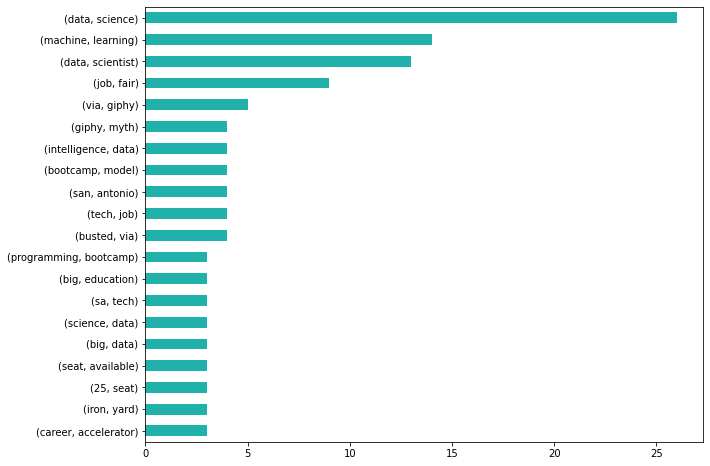

In [56]:
plt.figure(figsize=(10,8))
codeup_bigrams.sort_values(ascending=True).plot.barh(color='lightseagreen')

Top Bigrams for Codeup Articles


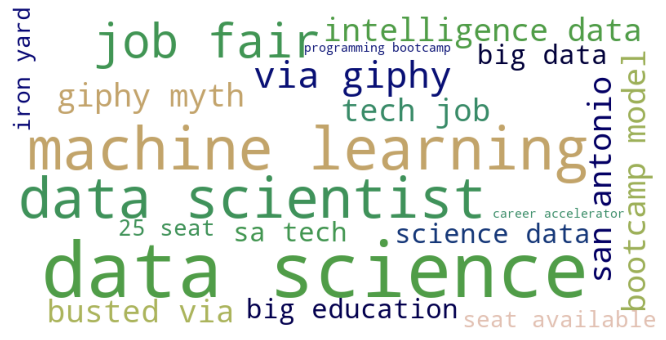

In [114]:
print('Top Bigrams for Codeup Articles')
data = {k[0] + ' ' + k[1]: v for k, v in codeup_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [108]:
from PIL import Image

In [116]:
codeup_bigrams = (pd.Series(nltk.ngrams(codeup_words,2)).value_counts())

In [122]:
def makeImage(text):
    plt.figure(figsize=(16,9))
    chicken_mask = np.array(Image.open("xavierthechicken.jpg"))

    wc = WordCloud(background_color="white", colormap = 'gist_earth',width=800, height=400, contour_width=3, contour_color='steelblue',mask=chicken_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

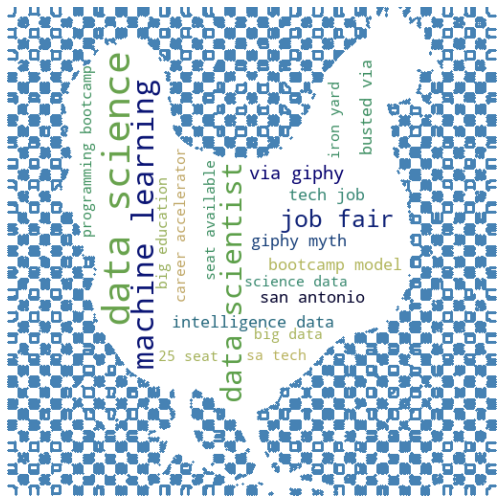

In [124]:
makeImage(data)

In [125]:
codeup_bigrams = (pd.Series(nltk.ngrams(codeup_words,2)).value_counts().head(20))

In [138]:
codeup_bigrams

(data, science)            26
(machine, learning)        14
(data, scientist)          13
(job, fair)                 9
(via, giphy)                5
(intelligence, data)        4
(bootcamp, model)           4
(san, antonio)              4
(giphy, myth)               4
(tech, job)                 4
(busted, via)               4
(big, education)            3
(sa, tech)                  3
(science, data)             3
(big, data)                 3
(seat, available)           3
(25, seat)                  3
(iron, yard)                3
(programming, bootcamp)     3
(career, accelerator)       3
dtype: int64

### 3.) Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [126]:
categories = ["business", "sports", "technology", "entertainment", "science", "world"]
news_df = a.get_all_news_articles(categories)

In [129]:
business_words = clean(' '.join(news_df[news_df.category=='business'].content))

In [131]:
sports_words = clean(' '.join(news_df[news_df.category=='sports'].content))

In [132]:
tech_words = clean(' '.join(news_df[news_df.category=='technology'].content))

In [133]:
entertainment_words = clean(' '.join(news_df[news_df.category=='entertainment'].content))

In [134]:
science_words = clean(' '.join(news_df[news_df.category=='science'].content))

In [135]:
world_words = clean(' '.join(news_df[news_df.category=='world'].content))

In [153]:
business_bigrams = (pd.Series(nltk.ngrams(business_words.split(),2)).value_counts().head(20))

sports_bigrams = (pd.Series(nltk.ngrams(sports_words.split(),2)).value_counts().head(20))

tech_bigrams = (pd.Series(nltk.ngrams(tech_words.split(),2)).value_counts().head(20))

entertainment_bigrams = (pd.Series(nltk.ngrams(entertainment_words.split(),2)).value_counts().head(20))

science_bigrams = (pd.Series(nltk.ngrams(science_words.split(),2)).value_counts().head(20))

world_bigrams = (pd.Series(nltk.ngrams(world_words.split(),2)).value_counts().head(20))

In [154]:
entertainment_bigrams

(in, the)          9
(of, the)          6
(he, added)        5
(at, the)          4
(raj, kundra)      4
(that, he)         4
(said, that)       4
(said, the)        3
(videos, case)     3
(have, been)       3
(and, his)         3
(social, media)    3
(about, the)       3
(on, social)       3
(he, was)          3
(on, tuesday)      3
(added, a)         3
(the, upcoming)    3
(porn, videos)     3
(has, been)        3
dtype: int64

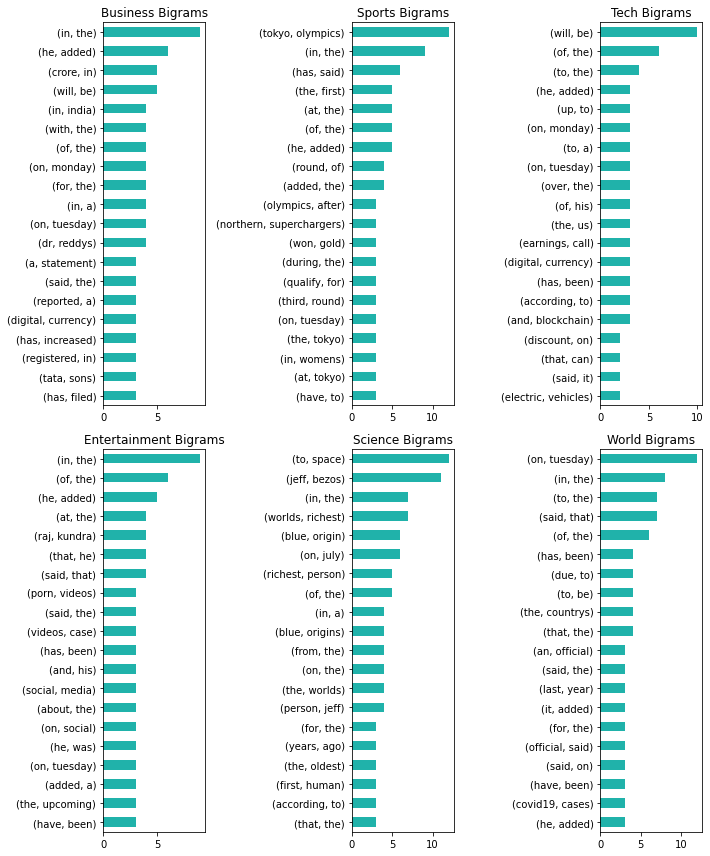

In [155]:
plt.subplot(2,3,1)
business_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Business Bigrams')

plt.subplot(2,3,2)
sports_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Sports Bigrams')

plt.subplot(2,3,3)
tech_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Tech Bigrams')

plt.subplot(2,3,4)
entertainment_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Entertainment Bigrams')

plt.subplot(2,3,5)
science_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Science Bigrams')

plt.subplot(2,3,6)
world_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('World Bigrams')

plt.tight_layout()
plt.show()

Top Bigrams for Business


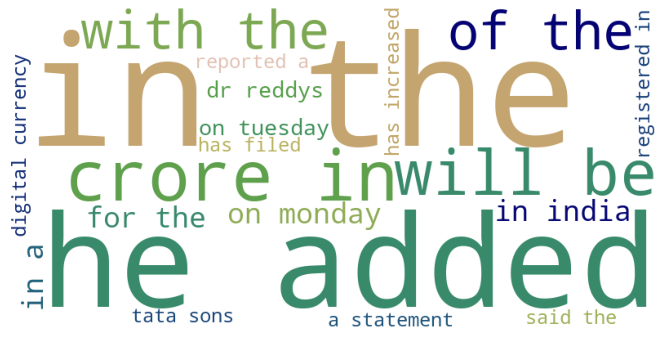

In [156]:
print('Top Bigrams for Business')
data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Sports


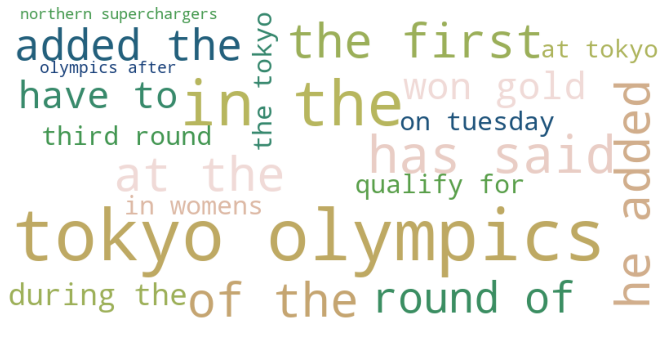

In [157]:
print('Top Bigrams for Sports')
data = {k[0] + ' ' + k[1]: v for k, v in sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Tech


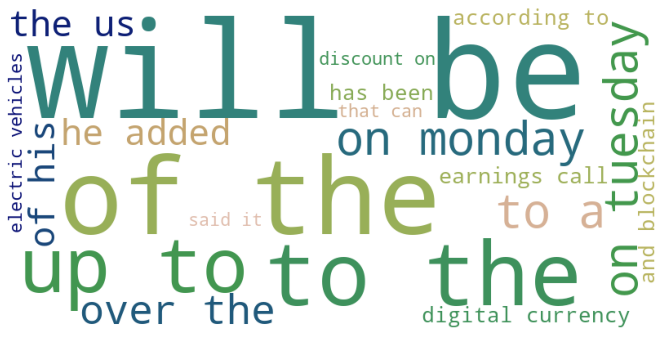

In [158]:
print('Top Bigrams for Tech')
data = {k[0] + ' ' + k[1]: v for k, v in tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Entertainment


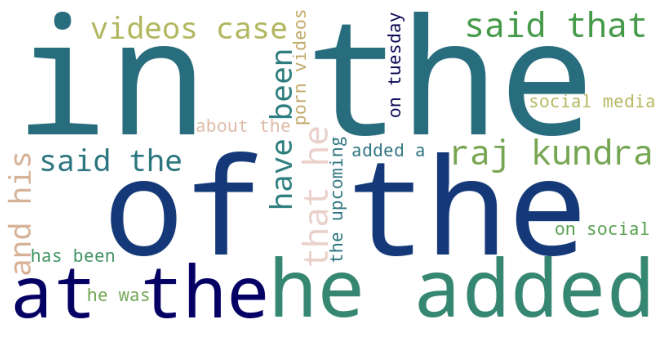

In [168]:
print('Top Bigrams for Entertainment')
data = {k[0] + ' ' + k[1]: v for k, v in entertainment_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Science


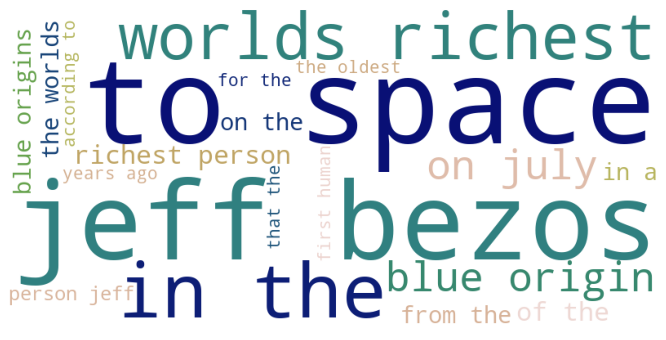

In [160]:
print('Top Bigrams for Science')
data = {k[0] + ' ' + k[1]: v for k, v in science_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for World


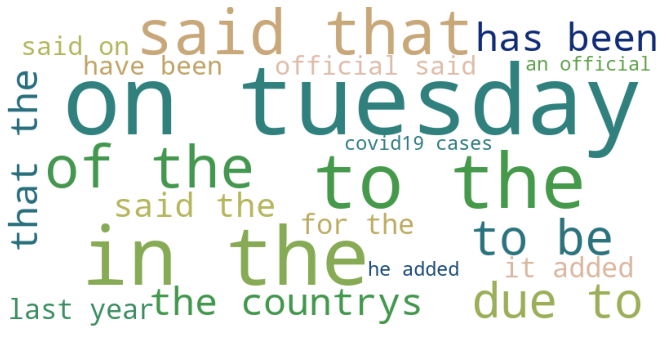

In [161]:
print('Top Bigrams for World')
data = {k[0] + ' ' + k[1]: v for k, v in world_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [195]:
def chicken(text):
    plt.figure(figsize=(16,9))
    chicken_mask = np.array(Image.open("newchickynugget.jpg"))

    wc = WordCloud(background_color="black", colormap = 'YlOrBr',width=800, height=400, contour_width=3, contour_color='peru',mask=chicken_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

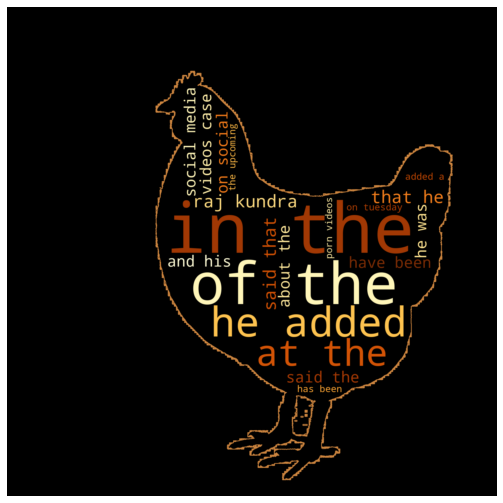

In [196]:
chicken(data)